In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Load Dataset
df1 = pd.read_csv('./swiss.csv')
df1.head()

Location  Fertility  Agriculture  Examination  Education  Catholic  \
0    Courtelary       80.2         17.0           15         12      9.96   
1      Delemont       83.1         45.1            6          9     84.84   
2  Franches-Mnt       92.5         39.7            5          5     93.40   
3       Moutier       85.8         36.5           12          7     33.77   
4    Neuveville       76.9         43.5           17         15      5.16   

   InfantMortality  
0             22.2  
1             22.2  
2             20.2  
3             20.3  
4             20.6

In [7]:
#Dataset Attributes
df1 = df1.drop('Location', axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 6 columns):
Fertility          47 non-null float64
Agriculture        47 non-null float64
Examination        47 non-null int64
Education          47 non-null int64
Catholic           47 non-null float64
InfantMortality    47 non-null float64
dtypes: float64(4), int64(2)
memory usage: 2.3 KB


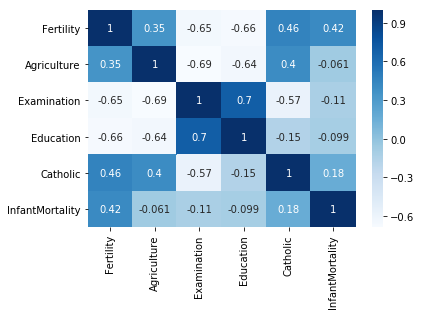

In [8]:
#Visualization of Correlations
import seaborn as sns
sns.heatmap(df1.corr(), annot=True, cmap="Blues")

In [11]:
#Define X and y variables
X = df1.drop('InfantMortality', axis = 1).values
y = df1['InfantMortality'].values

In [12]:
#Split the Dataset into Training set and Testing Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 100)

In [13]:
#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train)
X_test2 = sc.fit_transform(X_test)

LINEAR REGRESSION

In [15]:
#Fitting Linear Regression to Dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lm = lin_reg.fit(X_train2, y_train)

In [16]:
#Create Prediction
y_pred = lm.predict(X_test2)

In [18]:
#Calculate MAE, MSE, and RMSE
from sklearn import metrics
print ('MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test,y_pred)))
print ('MSE: {:0.2f}'.format(metrics.mean_squared_error(y_test,y_pred)))
print ('RMSE: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))

MAE: 2.40
MSE: 9.84
RMSE: 3.14


POLYNOMIAL REGRESSION

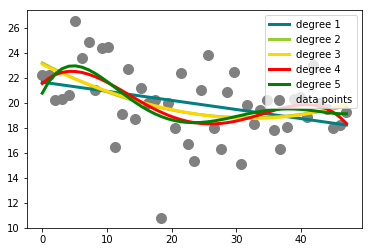

In [24]:
#Determine the Polynomial Size
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#Plot of Y variable
X_plot = np.linspace(0,len(y), len(y)) #Returns evenly spaced numbers array
plt.scatter(X_plot, y, color = 'grey', s = 100, marker = 'o', label = "data points")
colors = ['teal','yellowgreen','gold','red','green','violet','grey']
X_plot = X_plot.reshape(-1,1)

#Plot Logistical Regression Model
for count, degree in enumerate ([1,2,3,4,5]):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_plot, y)
    y_plot = model.predict(X_plot)
    plt.plot(X_plot, y_plot, color = colors[count], linewidth=3, label = "degree %d" %degree)
    
plt.legend(loc='upper right')
plt.show()

POLYNOMIAL REGRESSION WITH GRIDSEARCH CV

In [26]:
#GridSearch CV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

cv2 = RepeatedKFold(n_splits = 10, n_repeats = 5, random_state = 100)
degrees = np.arange(1,10)

pipe_poly = Pipeline([('scl',StandardScaler()),
                      ('polynomial', PolynomialFeatures()),
                     ('clf', LinearRegression())])

param_poly = {'polynomial__degree': degrees,
             'clf__fit_intercept':[True,False],
             'clf__normalize':[True,False],
             'clf__copy_X':[True, False]}

opt_poly = GridSearchCV(pipe_poly, param_poly, cv = cv2, scoring = 'neg_mean_squared_error')

grids = [opt_poly]
grid_dict = {0:'Polynomial Regression'}

In [28]:
#Model Creation
#Create Heading
print ('Optimized Models')

#Fit the Grid Search Objects
for idx, optmodel in enumerate(grids):
    print ('\nEstimator: {}'.format(grid_dict[idx]))
    #Fit grid search
    optmodel.fit(X_train, y_train)
    #Best params
    print ('\nBest Params: {}'.format(optmodel.best_params_))
    #Predict on Test data with best params
    y_pred3 = optmodel.predict(X_test)
    
    #Intercept and Coefficients
    print ('\nIntercept: {:.2f}'.format(float(optmodel.best_estimator_.named_steps['clf'].intercept_)))
    print ('\nModel Coefficients: ')
    for name, score in zip(list(df1.drop('InfantMortality',axis = 1)),
                          optmodel.best_estimator_.named_steps['clf'].coef_):
        print (name, round(score,2))
        
        print ('\nMean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_pred3)))
        print ('\nMean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, y_pred3)))
        print ('\nRoot Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred3))))        

Optimized Models

Estimator: Polynomial Regression

Best Params: {'clf__copy_X': True, 'clf__fit_intercept': True, 'clf__normalize': True, 'polynomial__degree': 1}

Intercept: 19.81

Model Coefficients: 
Fertility 0.0

Mean Absolute Error: 2.49

Mean Squared Error: 10.54

Root Mean Squared Error: 3.25
Agriculture 2.57

Mean Absolute Error: 2.49

Mean Squared Error: 10.54

Root Mean Squared Error: 3.25
Examination 0.5

Mean Absolute Error: 2.49

Mean Squared Error: 10.54

Root Mean Squared Error: 3.25
Education 0.73

Mean Absolute Error: 2.49

Mean Squared Error: 10.54

Root Mean Squared Error: 3.25
Catholic 1.12

Mean Absolute Error: 2.49

Mean Squared Error: 10.54

Root Mean Squared Error: 3.25


C:\Users\iknow\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [32]:
#Nested Cross Validation
for idx, optmodel in enumerate(grids):
    scoresNonNested = optmodel.predict(X_test)
    scoresNested = cross_val_score (optmodel,X, y, scoring = 'neg_mean_squared_error', cv = 5, n_jobs = -1)
    
    print ('\nEstimator: {}'.format(grid_dict[idx]))
    print('\nNonNestedCV RMSE: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, scoresNonNested))))
    print('\nNestedCV RMSE: {:0.2f}'.format(np.sqrt(np.mean(-scoresNested))))


Estimator: Polynomial Regression

NonNestedCV RMSE: 3.25

NestedCV RMSE: 5.96
